In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import necessary libraries
import yfinance as yf
import pandas as pd

# Download GameStop stock data
gamestop_data = yf.download('GME', start='2020-01-01', end='2024-01-01')

# Display the data
print(gamestop_data)

# Save to CSV if needed
gamestop_data.to_csv('gamestop_stock_data.csv')

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02   1.535000   1.617500   1.517500   1.577500   1.577500  17814400
2020-01-03   1.552500   1.562500   1.460000   1.470000   1.470000  14175600
2020-01-06   1.450000   1.477500   1.400000   1.462500   1.462500  13579200
2020-01-07   1.442500   1.457500   1.360000   1.380000   1.380000  20912000
2020-01-08   1.372500   1.462500   1.352500   1.430000   1.430000  22517600
...               ...        ...        ...        ...        ...       ...
2023-12-22  16.780001  17.200001  16.450001  16.969999  16.969999   3325100
2023-12-26  16.980000  17.410000  16.820000  17.360001  17.360001   3079600
2023-12-27  17.430000  18.370001  17.370001  18.370001  18.370001   4800100
2023-12-28  18.049999  18.320000  17.850000  18.070000  18.070000   3574800
2023-12-29  18.040001  18.160000  17.459999  17.530001  17.530001   4524200

[1006 rows 

In [6]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup

# URL for GameStop revenue data
url = 'https://finance.yahoo.com/quote/GME/financials?p=GME'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the revenue section (you may need to adjust the selector based on the webpage structure)
    revenue_section = soup.find('section', {'data-test': 'qsp-financial'})
    
    if revenue_section:
        revenue_data = revenue_section.find_all('tr')  # This is just an example; adjust as necessary
        for row in revenue_data:
            cells = row.find_all('td')
            if cells:
                print([cell.text for cell in cells])  # Print each cell's text
else:
    print(f"Failed to retrieve data: {response.status_code}")

Failed to retrieve data: 404


In [7]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup

# URL for GameStop revenue data from MacroTrends
url = 'https://www.macrotrends.net/stocks/charts/GME/game-stop/revenue'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the revenue data table
    table = soup.find('table', {'class': 'historical_data_table'})
    
    # Extract and print revenue information
    revenue_data = {}
    if table:
        rows = table.find_all('tr')
        for row in rows[1:]:  # Skip header row
            cols = row.find_all('td')
            if len(cols) >= 2:  # Check for at least two columns
                year = cols[0].text.strip()
                revenue = cols[1].text.strip()
                revenue_data[year] = revenue

        # Print the revenue data
        for year, revenue in revenue_data.items():
            print(f"{year}: {revenue}")
    else:
        print("Revenue data table not found.")
else:
    print(f"Failed to retrieve data: {response.status_code}")

Failed to retrieve data: 403


[*********************100%***********************]  1 of 1 completed


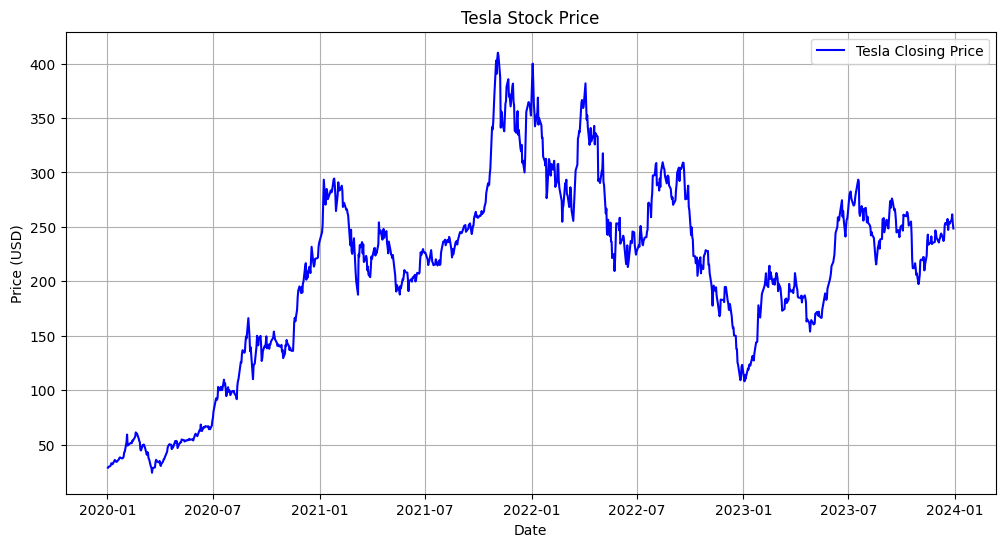

In [9]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Download Tesla stock data
tesla_data = yf.download('TSLA', start='2020-01-01', end='2024-01-01')

# Step 2: Create a dashboard for Tesla stock data
plt.figure(figsize=(12, 6))
plt.plot(tesla_data['Close'], label='Tesla Closing Price', color='blue')
plt.title('Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

[*********************100%***********************]  1 of 1 completed


NameError: name 'revenue_df' is not defined

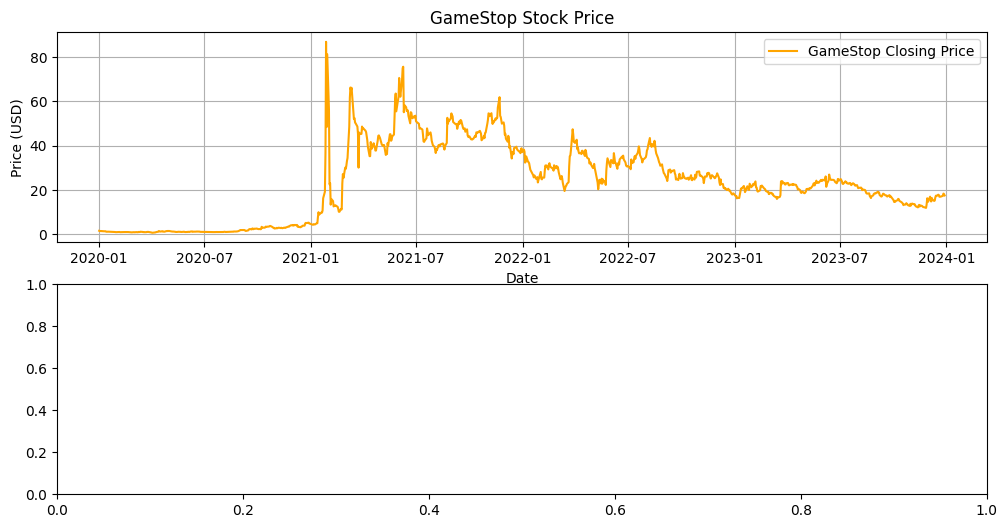

In [10]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download GameStop stock data
gamestop_data = yf.download('GME', start='2020-01-01', end='2024-01-01')

# Step 2: Extract GameStop revenue data using web scraping
# Change URL to a different source if needed
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
response = requests.get(url)

if response.status_code == 200:
    # Parse the HTML
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the table with revenue data
    table = soup.find('table')
    rows = table.find_all('tr')
    
    # Extract revenue data
    revenue_data = {}
    for row in rows[1:]:  # Skip header row
        columns = row.find_all('td')
        if len(columns) >= 2:
            year = columns[0].text.strip()
            revenue = columns[1].text.strip().replace('$', '').replace(',', '')
            revenue_data[year] = float(revenue)

    # Convert the revenue data to a DataFrame
    revenue_df = pd.DataFrame(list(revenue_data.items()), columns=['Year', 'Revenue'])
    revenue_df['Year'] = pd.to_datetime(revenue_df['Year'], format='%Y')

# Step 3: Create a dashboard for GameStop stock data and revenue data
plt.figure(figsize=(12, 6))

# Plot GameStop stock closing price
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(gamestop_data['Close'], label='GameStop Closing Price', color='orange')
plt.title('GameStop Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()

# Plot GameStop revenue data
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.bar(revenue_df['Year'], revenue_df['Revenue'], color='green')
plt.title('GameStop Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue (USD)')
plt.grid()

# Show the dashboard
plt.tight_layout()
plt.show()